In [10]:
#Libraries
import pandas as pd
import numpy as np
import folium
import geopandas as gpd

In [36]:
#Carga archivos shape
archivo_shape = gpd.read_file('C:/Users/ramir/Documents/Ramiro DS/DS folium/D09JS.shp')

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('C:/Users/ramir/Documents/Ramiro DS/DS folium/D09JS.kml', driver='KML')
#archivo_shape_kml = gpd.read_file('C:/Users/ramir/Documents/Ramiro DS/DS folium/D09JS.kml')

archivo_shape_shx = gpd.read_file('C:/Users/ramir/Documents/Ramiro DS/DS folium/D09JS.shx')

                                            geometry
0  POLYGON ((677640.696 2289302.471, 677703.692 2...
1  POLYGON ((678082.105 2289230.153, 678131.076 2...
2  POLYGON ((677882.344 2289097.199, 677925.128 2...
3  POLYGON ((677849.271 2289104.475, 677850.263 2...
4  POLYGON ((678395.282 2289036.569, 678441.703 2...
Index(['geometry'], dtype='object')
                                                 geometry
count                                                 193
unique                                                193
top     POLYGON ((677640.696340589 2289302.47114243, 6...
freq                                                    1


<Axes: >

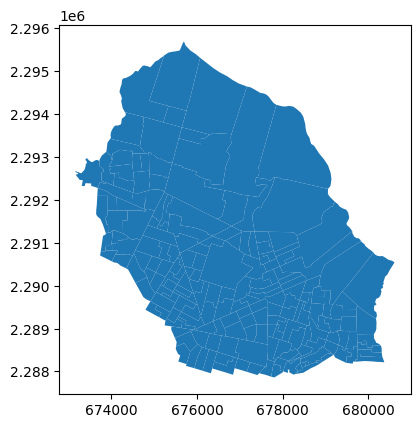

In [55]:
print(archivo_shape.head())
print(archivo_shape.columns)
print(archivo_shape.describe())
archivo_shape.plot()


In [45]:
# Map
map = folium.Map(location=[20.72913, -103.30492], zoom_start=15)



In [28]:
# Normalizar el sistema de coordenadas a latitud y longitud
print(archivo_shape.crs)
archivo_shape = archivo_shape.set_crs(epsg='4326')
archivo_shape_shx = archivo_shape_shx.set_crs(epsg='4326')

EPSG:4326


In [29]:
#convert shape a obj GeoJson
geo_json = archivo_shape.to_crs(epsg='4326').to_json()
geo_json_shx = archivo_shape_shx.to_crs(epsg='4326').to_json()

In [ ]:
folium.GeoJson(geo_json, name='Capa 1').add_to(map)
folium.GeoJson(geo_json_shx, name='Capa 2').add_to(map)
folium.GeoJson(my_map, name='Capa 3').add_to(map)
map

In [33]:
#Libraries
import folium
import geopandas as gpd

#Load archivos
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('C:/Users/ramir/Documents/Ramiro DS/DS folium/D09JS.kml', driver='KML')

mi_mapa = folium.Map(location=[20.72913, -103.30492], zoom_start=12)

for index, fila in my_map.iterrows():
    nombre_poligono = str(index + 1)
    coordenadas = fila['geometry'].centroid.coords[0]  # Extraer las coordenadas del centro del polígono

    # se puede dejar popup o tooltip
    geojson = folium.GeoJson(
        fila['geometry'],
        name=nombre_poligono,
        tooltip=nombre_poligono,
        popup=nombre_poligono,
    )

    geojson.add_to(mi_mapa)

mi_mapa


AttributeError: 'NoneType' object has no attribute 'drvsupport'

In [9]:
#Csv to DataFrame
df_coordenadas0 = pd.read_csv('coordinates_0.csv')
df_coordenadas1 = pd.read_csv('coordinates_1.csv')

df_coordenadas0.head()

,Coordinates,Exact_Match
0,"20.636858,-103.472197",True
1,"20.636985,-103.47216",True
2,"20.6366303,-103.4717074",True
3,"20.6387863,-103.471555",True
4,"20.6426109,-103.4778113",True


In [15]:
#Contamos la cantidad de filas null
print(np.count_nonzero(df_coordenadas0.isnull()))
print(np.count_nonzero(df_coordenadas1.isnull()))

436
429


In [16]:
#copia de df coordenadas para proxima limpieza
df_coordenadas0_copy = df_coordenadas0.copy()
df_coordenadas1_copy = df_coordenadas1.copy()

df_coordenadas0_copy.dropna(inplace=True)
df_coordenadas1_copy.dropna(inplace=True)


In [21]:
df_coordenadas1_copy.count()

Coordinates    621
Exact_Match    621
dtype: int64

In [20]:
# Eliminamos la columna exact_match
df_coordenadas0_copy.drop('Exact_Match',axis=1)
df_coordenadas1_copy.drop('Exact_Match',axis=1)

,Coordinates
1,"20.6505601,-103.2592249"
2,"20.650124,-103.2612969"
3,"20.651629,-103.2595924"
5,"20.6705078,-103.3128712"
13,"20.6420491,-103.4748972"
...,...
1044,"20.6449319,-103.2568163"
1045,"20.6370701,-103.2881301"
1046,"20.3927658,-102.3485132"
1047,"20.6454185,-103.2567858"


In [25]:
# Divide la columna "coordinates" en dos columnas separadas
df_coordenadas0_copy[['latitud', 'longitud']], df_coordenadas1_copy[['latitud', 'longitud']] = df_coordenadas0_copy['Coordinates'].str.split(',', expand=True), df_coordenadas1_copy['Coordinates'].str.split(',', expand=True)


In [28]:
df_coordenadas0_copy.drop(['Exact_Match', 'Coordinates'], axis=1, inplace=True)
df_coordenadas1_copy.drop(['Exact_Match', 'Coordinates'], axis=1, inplace=True)
df_coordenadas0_copy.head()

,latitud,longitud
0,20.636858,-103.472197
1,20.636985,-103.47216
2,20.6366303,-103.4717074
3,20.6387863,-103.471555
4,20.6426109,-103.4778113


In [ ]:
#creo hotmap
mi_mapa_calor = folium.Map(location=[20.72913, -103.30492], zoom_start=12)
mi_mapa_calor1 = folium.Map(location=[20.72913, -103.30492], zoom_start=12)
mi_mapa_calor_unido = folium.Map(location=[20.72913, -103.30492], zoom_start=12)

mi_mapa_calor

In [ ]:
from folium.plugins import HeatMap

heatmap_data_0 = [[row['latitud'], row['longitud']] for index, row in df_coordenadas0_copy.iterrows()]
HeatMap(heatmap_data_0).add_to(mi_mapa_calor)

heatmap_data_1 = [[row['latitud'], row['longitud']] for index, row in df_coordenadas1_copy.iterrows()]
HeatMap(heatmap_data_1).add_to(mi_mapa_calor1)


heatmap_data_1 = [[row['latitud'], row['longitud']] for index, row in df_coordenadas1_copy.iterrows()]
heatmap_data_0 = [[row['latitud'], row['longitud']] for index, row in df_coordenadas0_copy.iterrows()]
HeatMap(heatmap_data_0 + heatmap_data_1).add_to(mi_mapa_calor_unido)
 
#mi_mapa_calor

mi_mapa_calor1

#mi_mapa_calor_unido #contiene el df_coordenadas0 y el df_coordenadas1

In [61]:
mi_mapa_markercluster = folium.Map(location=[20.72913, -103.30492], zoom_start=12)
mi_mapa_markercluster1 = folium.Map(location=[20.72913, -103.30492], zoom_start=12)

# Crear una capa MarkerCluster
marker_cluster = plugins.MarkerCluster().add_to(mi_mapa_markercluster)
marker_cluster1 = plugins.MarkerCluster().add_to(mi_mapa_markercluster1)


for index, row in df_coordenadas0_copy.iterrows():
    latitud = row['latitud']
    longitud = row['longitud']
    folium.Marker(location=[latitud, longitud]).add_to(marker_cluster)

    
for index, row in df_coordenadas1_copy.iterrows():
    latitud = row['latitud']
    longitud = row['longitud']
    folium.Marker(location=[latitud, longitud]).add_to(marker_cluster1)

# Mostrar el mapa
mi_mapa_markercluster
mi_mapa_markercluster1

